### Predicting call volumes based on the number of hours.

#### Import Data

In [27]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\CRM_calls.csv")

In [29]:
#validate data
df.head()

,hours,Total_Calls
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,hours,Total_Calls
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Clean Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hours        25 non-null     float64
 1   Total_Calls  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [7]:
df.isnull()

,hours,Total_Calls
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


- There are 25 observations with 2 columns in this dataset
- No duplicates
- No missing value and columns have correct datatypes

In [8]:
df.columns

Index(['hours', 'Total_Calls'], dtype='object')

- column name has to be standardized i.e. 

In [9]:
lc = []
for i in range(len(df.columns)):
    lc.append(df.columns[i].replace('_','').lower())
df.columns = lc
df.columns


Index(['hours', 'totalcalls'], dtype='object')

In [10]:
#correlation between hpurs and totalcalls
df.corr()

,hours,totalcalls
hours,1.000000,0.976191
totalcalls,0.976191,1.000000


- There is a strong positive correlation between number of hours and total calls recorded as shown in the table and heatmap below.

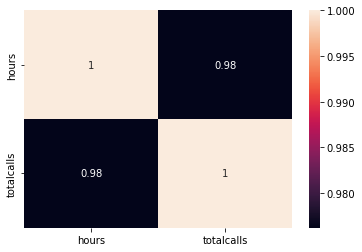

In [11]:
#correlation using heatmap
dfcorr_viz = sns.heatmap(df[['hours', 'totalcalls']].corr(), annot=True)

Since this is a regression problem and expected results will be digits, there is no need to convert the numeric variables to categorical variables

### Linear Regression Algorithm

In [12]:
#import machine learning packages
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### Split Data into Train and Test

In [13]:
#define independent/input features
X = df.drop(['totalcalls'], axis=1)
#define dependent/output variable
y = df['totalcalls']

#split data into training(80%) and testing(20%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#shape of dataset after split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

#### Create and Train(fit) Model for Prediction

In [14]:
#create the model for prediction using linear regression
regressor = LinearRegression()

#train/fit model for prediction using training data(X & y)
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#test the model using test data(X)
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Create Coefficients and Intercept

In [16]:
#for every linear regression, there is an intercept and slope/coefficient
#slope/coefficient
coefficient = regressor.coef_
print(coefficient)


#intercept
intercept = regressor.intercept_
print(intercept)

[9.91065648]
2.018160041434683


- There are ~10 calls recorded as every hour passes.
- for every hour passed, there are 9.91 calls recorded.

In [19]:
# component = pd.DataFrame(zip(X.columns,coefficient), columns=['component', 'value'])


In [20]:
# component

,component,value
0,hours,9.910656


In [22]:
# component = component.append({'component':'intercept', 'value':regressor.intercept_}, ignore_index=True)
# component

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23900\1609934971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component = component.append({'component':'intercept', 'value':regressor.intercept_}, ignore_index=True)


,component,value
0,hours,9.910656
1,intercept,2.018160


#### Evaluate the Model

In [23]:
# #prediction score
# r2_score(y_test, y_pred)

0.9454906892105356

In [17]:
#check coefficient of determination(prediction score) (always X_test versus y_test)
regressor.score(X_test, y_test)

0.9454906892105356

R-squared compares your model's predictions to the mean of the target. Can range from -inf(a very poor model) to 1.

- Rsquare is 0.945(94.5%)

In [18]:
#now, lets see the prediction on which the accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


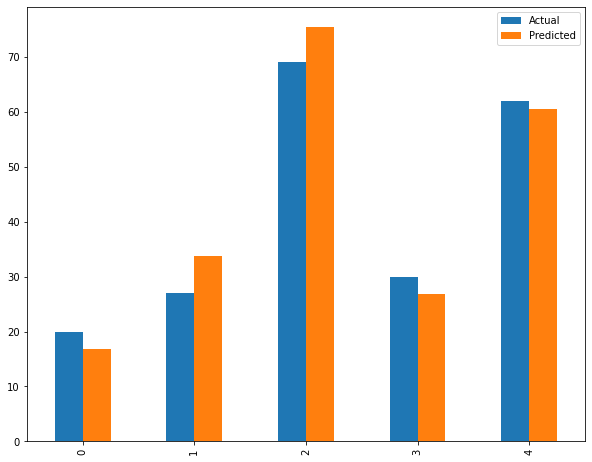

In [19]:
df1 = df.head()
df1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.8', color='blue')
# plt.grid(which='minor', linestyle=':', linewidth='0.8', color='red')
plt.show()

### Model Validation

In [25]:
#let's validate the model
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r2: 0.9454906892105356


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r2: 0.9454906892105356


In [30]:
# from sklearn.metrics import mean_absolute_error

# mae = mean_absolute_error(y_test, y_pred)
# mae

4.183859899002975

In [32]:
# df = pd.DataFrame(data={'Actual': y_test, 'Predicted':y_pred})
# df['differences'] = df['Predicted'] - df['Actual']
# df

,Actual,Predicted,differences
0,20,16.884145,-3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,-3.205199
4,62,60.491033,-1.508967


MAE is the average of the absolute differences between prediction and actual values.

In [34]:
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_test, y_pred)
# mse

21.5987693072174

In [30]:
ds = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\CRM_calls.csv")

In [31]:
ds

,hours,Total_Calls
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [33]:
#identifyng the input feature X and output variable y in the df
a = df.drop(['Total_Calls'], axis = 1)
b = df['Total_Calls']
print(a.shape)
print(b.shape)

(25, 1)
(25,)


In [34]:
features_label = ds.columns[1:]
forest = RandomForestRegressor (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(a,b)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(a.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Total_Calls                    1.000000


In [35]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.2,random_state = 0)
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [36]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor ()
forest_regressor.fit(a_train, b_train)

RandomForestRegressor()

In [37]:
from sklearn.model_selection import cross_val_score
cv_10_results = cross_val_score(forest_regressor, a, b, cv=10)
print(cv_10_results)

[0.34906553 0.91398503 0.88884035 0.982759   0.26555287 0.92287018
 0.97451151 0.64249453 0.7480277  0.348662  ]


In [38]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest_regressor.fit(a_train, b_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [39]:
#now,lets test the model, predict on the X_test 229 rows and 19 columns
b_pred = forest_regressor.predict(a_test)

In [40]:
#now, lets see the prediction on which th accuracy level is achieved.
b_test = np.array(list(b_test))
b_pred = np.array(b_pred)
ds = pd.DataFrame({'Actual' : b_test.flatten(), 'Predicted' : b_pred.flatten()})
ds

,Actual,Predicted
0,20,19.414417
1,27,37.534917
2,69,84.165000
3,30,23.331917
4,62,63.759000


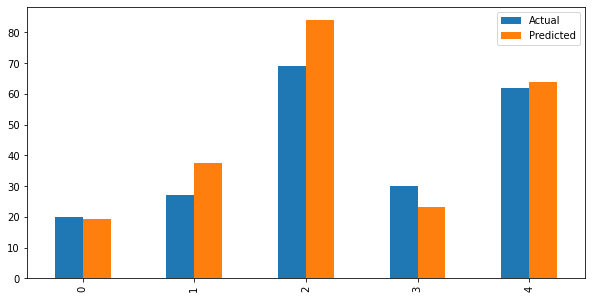

In [41]:
#Now, lets create a visual with the first 25 values.
df1 = ds.head(25)
df1.plot(kind ='bar', figsize=(10,5))
plt.show()

In [44]:
#lets calculate performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred))
print('Mean Squared Error:', metrics.mean_squared_error(b_test, b_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('r2:', metrics.r2_score(b_test,b_pred))

Mean Absolute Error: 6.942516666666668
Mean Squared Error: 77.77240367083337
Root Mean Squared Error: 8.818866348393843
r2: 0.8037239963889729
